<a href="https://colab.research.google.com/github/krishna9734/Rossmann-Sales-Prediction/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores

# Importing Essential Libraries

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

#to suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Data Set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
rossmann_df = pd.read_csv("/content/drive/MyDrive/Supervised ML Regression Capstone Project/Rossmann Stores Data.csv")
store_df = pd.read_csv("/content/drive/MyDrive/Supervised ML Regression Capstone Project/store.csv")

In [ ]:
# checking top 5 records of ross_df
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
# checking top 5 records of store_df
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## Okay, got it... Lets more clear about features present in Data set

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# Statistical Analysis

In [ ]:
# merging ross_df and store_df to create single dataframe
merged_df = rossmann_df.merge(store_df,on='Store',how='left')

In [ ]:
# checking top 5 records of merged dataframe
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
merged_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
# Concise summary merged dataframe
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:
# Some statistical properties of numerical features in data frame
merged_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [ ]:
# Checking Null Values
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

## Knowing the shape and size of dataset

In [ ]:
# Checking data(merged) columns,unique values
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Total number of rows and columns
print ("Rows     : " ,merged_df.shape[0])
print ("Columns  : " ,merged_df.shape[1])

Rows     :  1017209
Columns  :  18


In [ ]:
# Its product of Numbers of rows and columns present in Data set
merged_df.size

18309762

In [ ]:
# Checking Types of Data
merged_df.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

# Data Wrangling

In [ ]:
# Coverting the date into year, month, day, week of year
def convert_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [ ]:
# Applying the function of converting date
convert_date(merged_df)

In [ ]:
# Checking the converted dataframe
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31


In [ ]:
# Categories/Classes present in Each Variable
# For loop used to get results
print("total number Categories/Classes present in Each Variable")
for col in merged_df:
    uni=merged_df[col].nunique()
    print(f" {col} :- {uni}")

total number Categories/Classes present in Each Variable
 Store :- 1115
 DayOfWeek :- 7
 Date :- 942
 Sales :- 21734
 Customers :- 4086
 Open :- 2
 Promo :- 2
 StateHoliday :- 5
 SchoolHoliday :- 2
 StoreType :- 4
 Assortment :- 3
 CompetitionDistance :- 654
 CompetitionOpenSinceMonth :- 12
 CompetitionOpenSinceYear :- 23
 Promo2 :- 2
 Promo2SinceWeek :- 24
 Promo2SinceYear :- 7
 PromoInterval :- 3
 Year :- 3
 Month :- 12
 Day :- 31
 WeekOfYear :- 52


# Exploratory Data Analysis

In [ ]:
# Let's check DayOfWeek coloumn
merged_df['DayOfWeek'].value_counts()

5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64

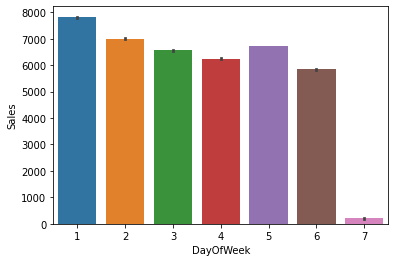

In [ ]:
# Relationship between Day of week and sales
sns.barplot(x='DayOfWeek',y='Sales', data=merged_df)

In [ ]:
# Checking average sales when there is no promotional advertisements running
Sales_with_no_promo = merged_df[(merged_df.Promo == 0) & (merged_df.Sales)].mean().sort_values(ascending = False)[0]
print(Sales_with_no_promo)

5928.965569239575


In [ ]:
# Checking average sales when there is promotional advertisements running
Sales_with_promo = merged_df[(merged_df.Promo == 1) & (merged_df.Sales)].mean().sort_values(ascending = False)[0]
print(Sales_with_promo)

8223.920367241544


In [ ]:
# percentages of stores either running with promo or without promo
100*merged_df.Promo.value_counts()/len(merged_df.Promo)

0    61.848548
1    38.151452
Name: Promo, dtype: float64

**There were around 62% Stores running without promotion on that day**

<Figure size 1440x432 with 0 Axes>

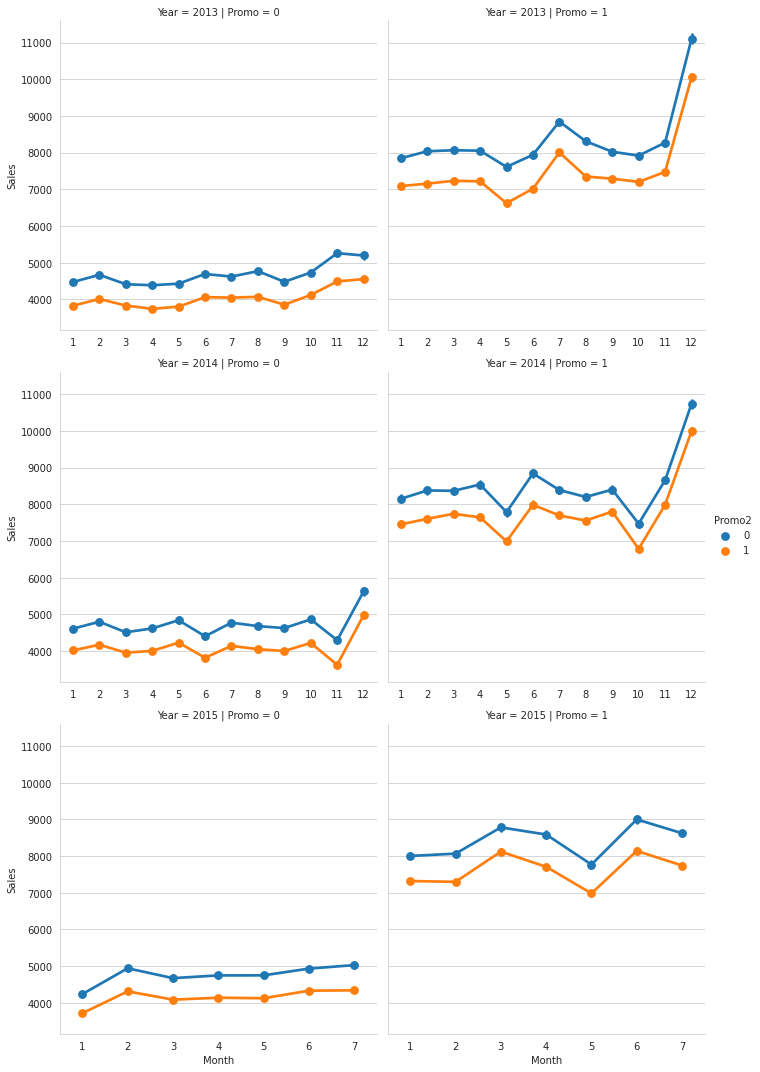

In [ ]:
# Relationship between Promo and sales on year wise
sns.set_style('whitegrid')
plt.figure(figsize=(20,6))
sns.factorplot(data = merged_df , x = 'Month', y = 'Sales',
               col = 'Promo',
               hue = 'Promo2',
               row = 'Year',
           sharex = False);

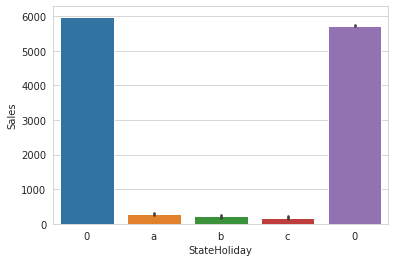

In [ ]:
# Checking sales on state holidays
sns.barplot(x="StateHoliday",y="Sales",data=merged_df)

There were more sales on Monday, probably because shops generally
remain closed on Sundays which had the lowest sales in a week. Sales nearly doubled when there was a promo on that day. The Analysis clearly states that if we run promotional advertisement then there is jump in average sales, So we can say running promotion is beneficial for stores. From year 2013 to 2015, we can see the major sales spikes first around February, March and April then
in Summer in May, June and July and then finally around the Christmas period in
November and December. Normally all stores, with few exceptions,
are closed on state holidays.

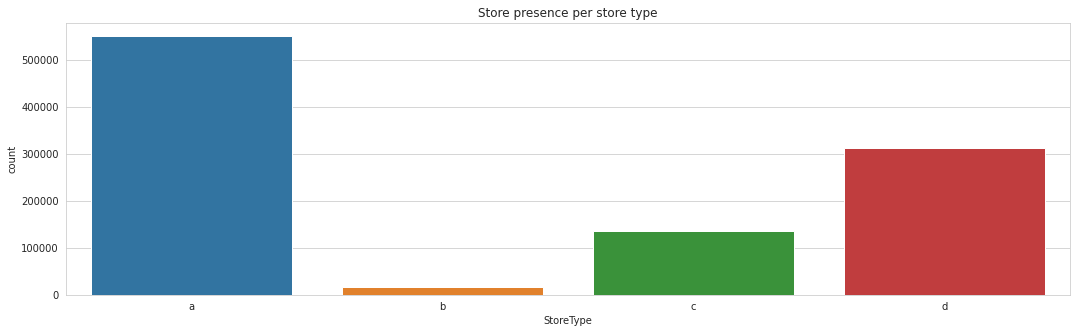

In [ ]:
# Checking number of stores per store type
plt.figure(figsize=(18,5))
plt.title("Store presence per store type")
sns.countplot(x='StoreType', data=merged_df, order=['a','b','c', 'd'])

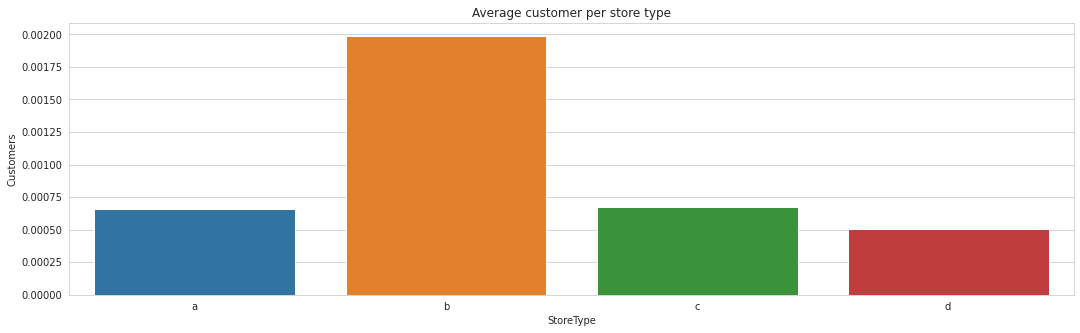

In [ ]:
# Checking customer share per store type
plt.figure(figsize=(18,5))
plt.title("Average customer per store type")
ax = sns.barplot(merged_df.groupby(by="StoreType").sum().Customers.index,merged_df.groupby(by="StoreType").mean().Customers/1e6,errwidth=0,order=['a','b','c', 'd'])

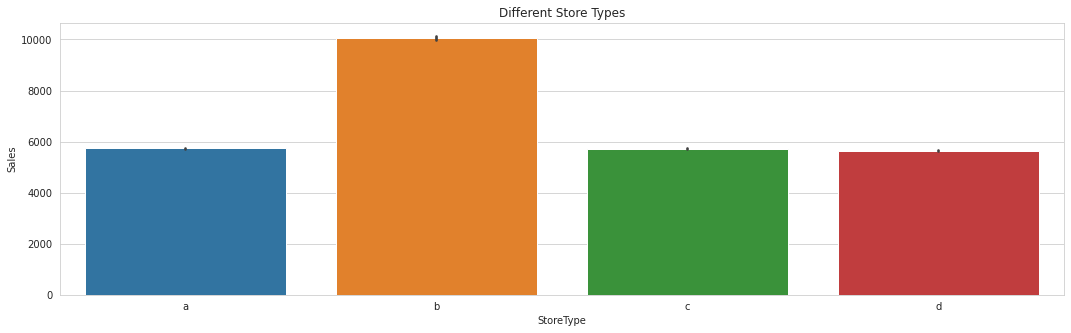

In [ ]:
# Checking relationship between StoreType and sales
plt.figure(figsize=(18,5))
plt.title("Different Store Types")
sns.barplot(x = 'StoreType', y = 'Sales', data = merged_df, order=['a','b','c', 'd']);

The bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle. Here, it can be seen that on an average store type b had the highest sales, and having lesser number of stores
there are more number of customers for store type b when compared with other types of stores. Store type A has the highest number of stores from the four different store types, but this doesn't mean it's the best performing store type. Store type a and c has quite similar kind of sales and customer share. 

In [ ]:
# Let's check monthly Sales and Customers over the years
# Creating variables for sales over the years
sales_df_2013 = merged_df[merged_df['Year']== 2013]
sales_df_2014 = merged_df[merged_df['Year']==2014]
sales_df_2015 = merged_df[merged_df['Year']== 2015]
# Creating variables for customers over the years
customers_df_2013 = merged_df[merged_df['Year']== 2013]
customers_df_2014 = merged_df[merged_df['Year']==2014]
customers_df_2015 = merged_df[merged_df['Year']== 2015]

In [ ]:
# Creating variables for sales over the months
sales_2013 = sales_df_2013.groupby('Month')['Sales'].sum().reset_index()
sales_2014 = sales_df_2014.groupby('Month')['Sales'].sum().reset_index()
sales_2015 = sales_df_2015.groupby('Month')['Sales'].sum().reset_index()
# Creating variables for customers over the months
customers_2013 = customers_df_2013.groupby('Month')['Customers'].sum().reset_index()
customers_2014 = customers_df_2014.groupby('Month')['Customers'].sum().reset_index()
customers_2015 = customers_df_2015.groupby('Month')['Customers'].sum().reset_index()

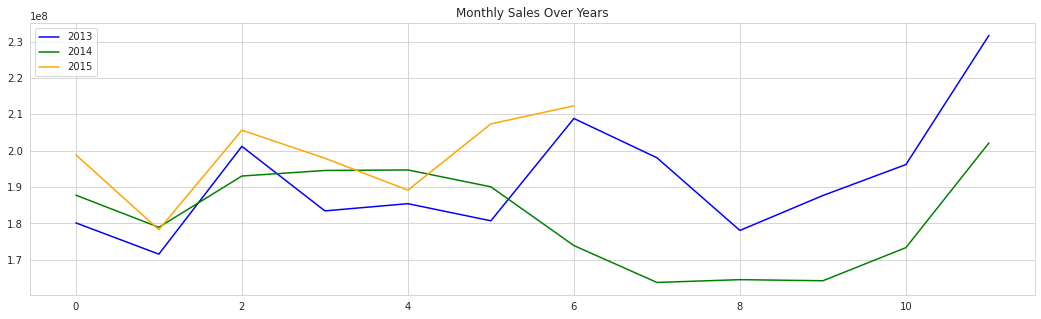

In [ ]:
# Plotting the sales through timeline
plt.figure(figsize=(18,5))
plt.title('Monthly Sales Over Years')
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='blue')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='green')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='orange')
plt.legend()

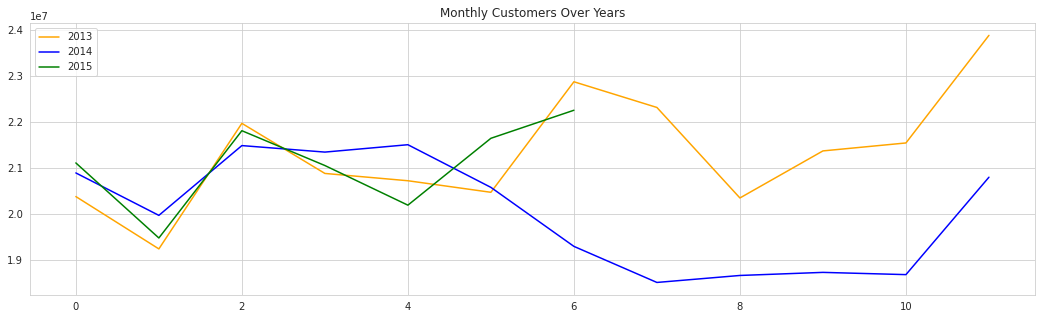

In [ ]:
# Plotting the customers through timeline
plt.figure(figsize=(18,5))
plt.title('Monthly Customers Over Years')
plt.plot(customers_2013.loc[:,'Customers'],label='2013',color='orange')
plt.plot(customers_2014.loc[:,'Customers'],label='2014',color='blue')
plt.plot(customers_2015.loc[:,'Customers'],label='2015',color='green')
plt.legend()

As we can see from the plot that the sales rise up by the end of the year before the holidays. And sales for 2014 went down there for a couple of months (e.g. June to September), indicating stores closed due to refurbishment. As we look over the years, from 2013 to 2015, we actually see the similar pattern for the customers also.

# Preprocessing the Data

Finding hidden patterns with Correlation in Data

Text(0.5, 1.0, 'Correlation Heatmap')

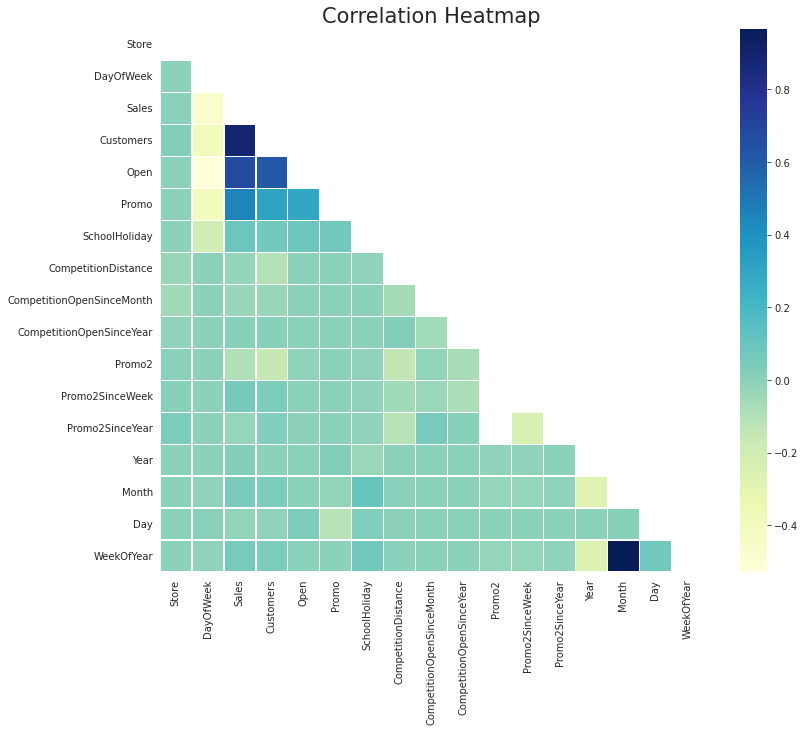

In [ ]:
corr = merged_df.corr()
corr
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (13, 10))
sns.heatmap(corr,square = True,mask=mask, linewidths = .5,ax=ax, cmap = "YlGnBu")
plt.title("Correlation Heatmap", fontsize=21)

We can first see the 0.9 between Customers and sales which suggests that they are positively correlated like we stated above in the analysis.

It's interesting to see that Sales and Promo with 0.4 actually correlate positively, since running a promotion increases the number of sales .

Sales correlates with Competition Distance have around 0.1, in a positive manner, like we said up the higher the competitionn distance the more sales per customer we do, which makes sense , the further our competition distance, the more monopolization Rossman can achieve in the region.

In [ ]:
# Removing the irrelevant part where the stores closed had 0 sale value
model_df = merged_df[merged_df.Open != 0]
model_df.drop('Open', axis=1, inplace=True)

In [ ]:
# mapping state holiday into boolean
model_df["StateHoliday"] = model_df['StateHoliday'].map({"0": 0, "a": 1, "b": 1, "c": 1 , 0: 1})

In [ ]:
# combining competition open since month and year into total months
model_df['CompetitionOpen'] = (model_df['Year'] - model_df['CompetitionOpenSinceYear'])*12 + (model_df['Month'] - model_df['CompetitionOpenSinceMonth'])
# correcting the negetive values
model_df['CompetitionOpen'] = model_df['CompetitionOpen'].apply(lambda x:0 if x < 0 else x)
# dropping both the columns
model_df.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)

In [ ]:
# Let's change promo2 features into meaningful input
# now combining promo2 to total months
model_df['Promo2Open'] = (model_df['Year'] - model_df['Promo2SinceYear'])*12 + (model_df['WeekOfYear'] - model_df['Promo2SinceWeek'])*0.230137

# correcting the negetive values
model_df['Promo2Open'] = model_df['Promo2Open'].apply(lambda x:0 if x < 0 else x)*model_df['Promo2']

# Dropping unecessary columns
model_df.drop(['Promo2SinceYear','Promo2SinceWeek','PromoInterval'],axis=1,inplace=True)

In [ ]:
# Let's set date and store as index
model_df.set_index(['Date','Store'],inplace=True)
# now sorting index following the time series
model_df.sort_index(inplace=True)

Total number of Outliers present in the Sales column are 13437.
The percentage of observations of sales greater than 28000 are 0.03742337682024463


[Text(0.5, 1.0, 'Outliers Distribution')]

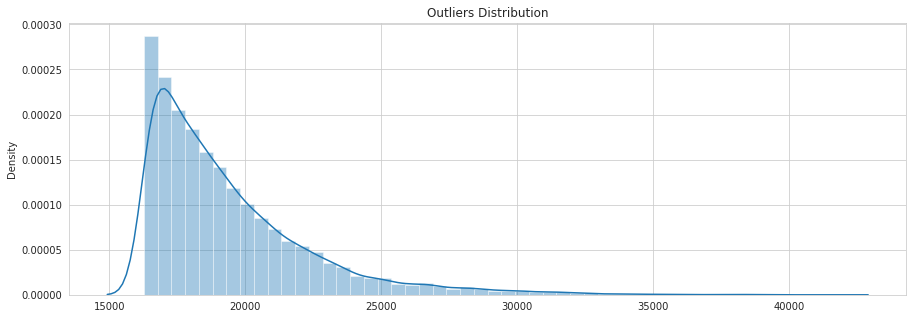

In [ ]:
# Let's check the outliars
# code to seperate outliers
mean_sales = np.mean(model_df['Sales'])
sd_sales = np.std(model_df['Sales'])
# More than 3 standard deviation is an outlier
threshold = 3
# code to identify them
outliers = []
for value in model_df['Sales']:
    z_score = (value-mean_sales)/sd_sales
    if z_score > threshold:
        outliers.append(value)
# total no of outliers        
print(f'Total number of Outliers present in the Sales column are {len(outliers)}.')
# percentage of sales greater than 28000 
sales_outliers = model_df.loc[model_df['Sales']>28000]
percentage_of_outliers = (len(sales_outliers)/len(model_df))*100
print (f'The percentage of observations of sales greater than 28000 are {percentage_of_outliers}')
# plotting the outlier distribution
plt.figure(figsize=(15,5))
sns.distplot(x=outliers).set(title='Outliers Distribution')

In statistics, an outlier is a data point that differs significantly from other observations. Outliers can occur by chance in any distribution, but they often indicate either measurement error or that the population has a heavy-tailed distribution. If the outliers are a valid occurrence it would be wise not to treat them by deleting or manipulating them especially when we have established the ups and downs of the target variable in relation to the other features. For these kinds of datasets tree based machine learning algorithms are used which are robust to outlier effect.


In [ ]:
# Let's identify the numerical and categorical columns
numeric_cols = [ 'Customers', 'CompetitionDistance', 'Year', 'Month', 'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'Sales']
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

In [ ]:
# Let's scale the data
# importing minmax scaler
from sklearn.preprocessing import MinMaxScaler
# fitting numeric columns
scaler = MinMaxScaler()
scaler.fit(model_df[numeric_cols])
model_df[numeric_cols] = scaler.transform(model_df[numeric_cols])

In [ ]:
# Let's Encode the catagorical features
# importing the one hot encoder
from sklearn.preprocessing import OneHotEncoder
# now fit encoder to the data
encoder = OneHotEncoder(sparse=False)
encoder.fit(model_df[categorical_cols])
encoded_features = list(encoder.get_feature_names(categorical_cols))
model_df[encoded_features] = encoder.transform(model_df[categorical_cols])
# dropping the catagorical columns
model_df.drop(categorical_cols,axis=1,inplace=True)

In [ ]:
# Let's split the data into Train and Test
# slicing the most recent six weeks and creating train and test set
# train
start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2015-06-14")
df_train = model_df.loc[start_train:end_train]
# test
start_test = pd.to_datetime("2015-06-15")
end_test = pd.to_datetime("2015-07-31")
df_test = model_df.loc[start_test:end_test]
# now X and y split for train and test
X_train = df_train.drop('Sales',axis=1)
y_train = df_train[['Sales']]
X_test = df_test.drop('Sales',axis=1)
y_test = df_test[['Sales']]
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of X_train is: (798540, 27)
The shape of y_train is: (798540, 1)
The shape of X_test is: (45852, 27)
The shape of y_test is: (45852, 1)


# Modeling

### Linear Regression

The MAE for the Training set is 0.022286
The MSE for the Training set is 0.000931
The RMSE for the Training set is 0.030508
The R2 for the Training set is 0.833293
The Adjusted R2 for the Training set is 0.833288
--------------------------
The MAE for the validation set is 0.023233
The MSE for the validation set is 0.001035
The RMSE for the validation set is 0.032167
The R2 for the validation set is 0.812804
The Adjusted R2 for the validation set is 0.812693


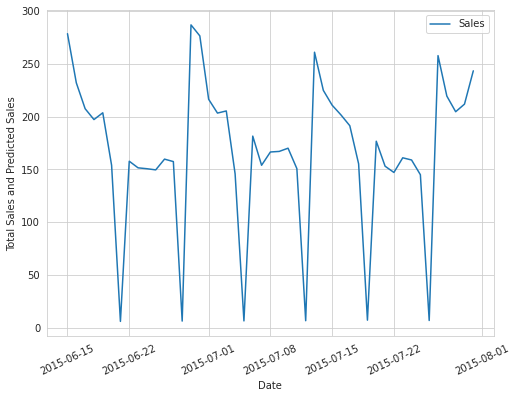

In [ ]:
from sklearn.linear_model import LinearRegression
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_test = X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
reg = LinearRegression().fit(X_train, y_train)

# metrics import
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' ,'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']

# Creating function to evaluate the model
def model_evaluation(model_name,model_variable,X_train,y_train,X_test,y_test):
  ''' This function predicts and evaluates various models for regression algorithms, visualizes results '''
      
  # making predictions
  y_pred_train = model_variable.predict(X_train)
  y_pred_test = model_variable.predict(X_test)

  # Plot the test results
  a = y_test.copy()
  a['Pred Sales'] = y_pred_test.tolist()
  df_plot = a.reset_index(level=['Date'])
  plot = df_plot.groupby('Date')['Sales','Pred Sales'].sum()
  plt.figure(figsize=(8,6))
  sns.lineplot(data = plot)
  plt.ylabel("Total Sales and Predicted Sales")
  plt.xticks(rotation = 25)

  # calculate metrics and print the results for test set
  # Mean Absolute Error or MAE
  MAE_train = round(mean_absolute_error(y_train,y_pred_train),6)
  MAE_test = round(mean_absolute_error(y_test,y_pred_test),6)
  # Mean Squared Error or MSE
  MSE_train = round(mean_squared_error(y_train,y_pred_train),6)
  MSE_test = round(mean_squared_error(y_test,y_pred_test),6)
  # Root Mean Squared Error or RMSE
  RMSE_train = round(mean_squared_error(y_train,y_pred_train,squared=False),6)
  RMSE_test = round(mean_squared_error(y_test,y_pred_test,squared=False),6)
  # R2
  R2_train = round(r2_score(y_train, y_pred_train),6)
  R2_test = round(r2_score(y_test, y_pred_test),6)
  # Adjusted R2
  Adj_r2_train = round(1 - (1-r2_score(y_train, y_pred_train)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),6)
  Adj_r2_test = round(1 - (1-r2_score(y_test, y_pred_test)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)
  # printing train results
  print(f'The MAE for the Training set is {MAE_train}')
  print(f'The MSE for the Training set is {MSE_train}')
  print(f'The RMSE for the Training set is {RMSE_train}')
  print(f'The R2 for the Training set is {R2_train}')
  print(f'The Adjusted R2 for the Training set is {Adj_r2_train}')
  print("--------------------------")
  print(f'The MAE for the validation set is {MAE_test}')
  print(f'The MSE for the validation set is {MSE_test}')
  print(f'The RMSE for the validation set is {RMSE_test}')
  print(f'The R2 for the validation set is {R2_test}')
  print(f'The Adjusted R2 for the validation set is {Adj_r2_test}')

  # Saving our results
  global comparison_columns
  metric_scores = [model_name,MAE_train,MSE_train,RMSE_train,R2_train,Adj_r2_train,MAE_test,MSE_test,RMSE_test,R2_test,Adj_r2_test]
  final_dict = dict(zip(comparison_columns,metric_scores))
  return [final_dict]

LinearRegression = model_evaluation('LinearRegression',reg,X_train,y_train,X_test,y_test)

In [ ]:
# function to create the comparison table
final_list = []
def add_list_to_final_df(dict_list):
  global final_list
  for elem in dict_list:
    final_list.append(elem)
  global comparisons_df
  comparisons_df = pd.DataFrame(final_list, columns= comparison_columns)
# add results to comparison df
add_list_to_final_df(LinearRegression)
# Print comparision df
comparisons_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,LinearRegression,0.022286,0.000931,0.030508,0.833293,0.833288,0.023233,0.001035,0.032167,0.812804,0.812693


### Decision Tree

The MAE for the Training set is 0.0097
The MSE for the Training set is 0.000221
The RMSE for the Training set is 0.01486
The R2 for the Training set is 0.960451
The Adjusted R2 for the Training set is 0.96045
--------------------------
The MAE for the validation set is 0.013818
The MSE for the validation set is 0.000436
The RMSE for the validation set is 0.020888
The R2 for the validation set is 0.921065
The Adjusted R2 for the validation set is 0.921019


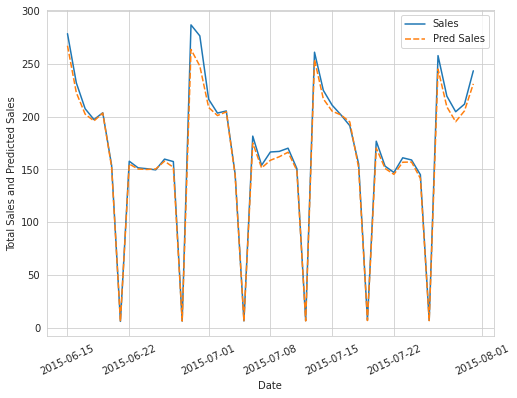

In [ ]:
# Importing libraries
from sklearn.tree import DecisionTreeRegressor
# fitting decision tree
dt_basic = DecisionTreeRegressor(min_samples_leaf=20)
dt_basic.fit(X_train,y_train)
# decision tree evaluation
decision_tree = model_evaluation('Decision Tree Regressor',dt_basic,X_train,y_train,X_test,y_test)

In [ ]:
# add results to comparison df
add_list_to_final_df(decision_tree)

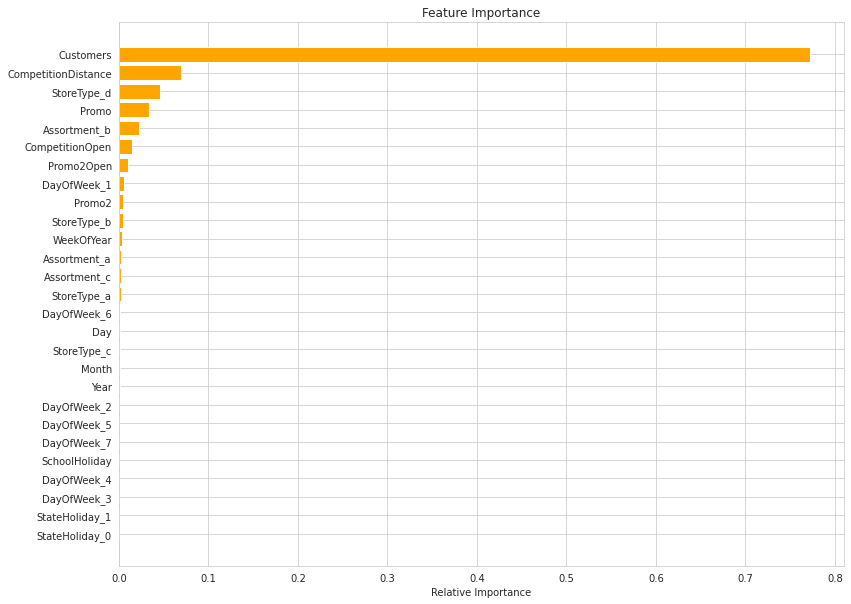

In [ ]:
# features importance
features = X_train.columns
importances = dt_basic.feature_importances_
indices = np.argsort(importances)
# plotting feeature importance
plt.figure(figsize=(13,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Decision tree algorithm falls under the category of supervised learning. They can be used to solve both regression and classification problems. Decision tree uses the tree representation to solve the problem in which each leaf node corresponds to a class label and attributes are represented on the internal node of the tree. The results show that a simple decision tree is performing pretty well on the validation as well as on the train set.

### Random Forest

The MAE for the Training set is 0.003066
The MSE for the Training set is 2.2e-05
The RMSE for the Training set is 0.004729
The R2 for the Training set is 0.995995
The Adjusted R2 for the Training set is 0.995995
--------------------------
The MAE for the validation set is 0.010317
The MSE for the validation set is 0.000242
The RMSE for the validation set is 0.015566
The R2 for the validation set is 0.956166
The Adjusted R2 for the validation set is 0.95614


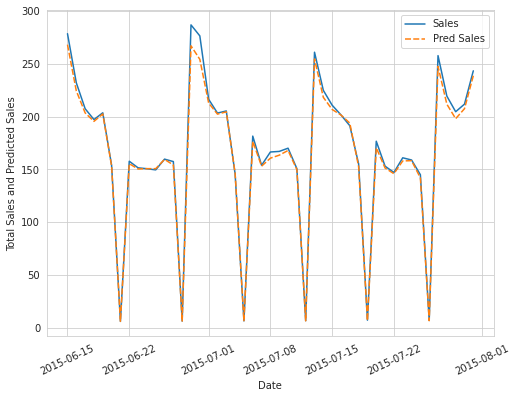

In [ ]:
# Importing libraries
from sklearn.ensemble import RandomForestRegressor
# fitting random forest
random_forest = RandomForestRegressor(n_estimators=50,random_state=47)
random_forest.fit(X_train,y_train)
# random forest evaluation
rf = model_evaluation('Random Forest Regressor',random_forest,X_train,y_train,X_test,y_test)

In [ ]:
# add results to comparison df
add_list_to_final_df(rf)

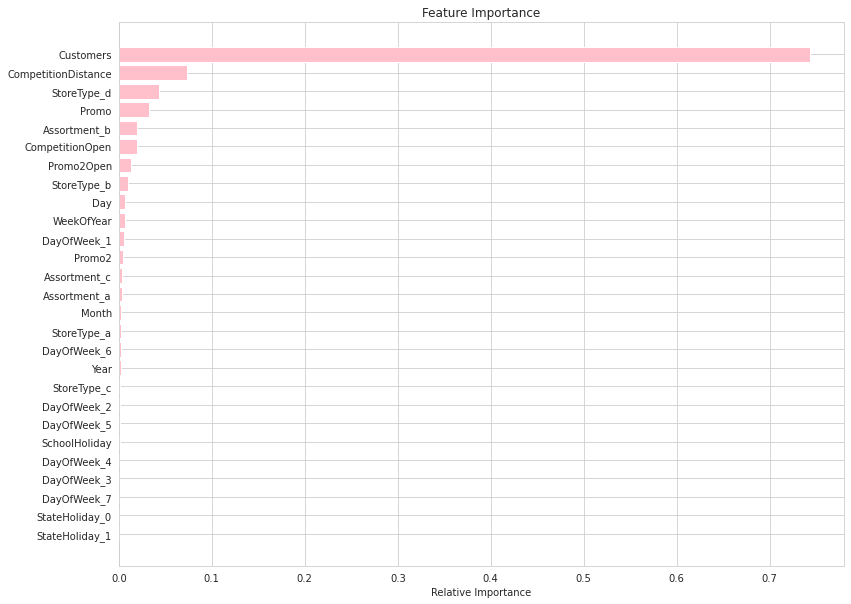

In [ ]:
# features importance
features = X_train.columns
importances = random_forest.feature_importances_
indices = np.argsort(importances)
# plotting feeature importance
plt.figure(figsize=(13,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='pink', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It builds multiple decision trees and merges them together to get a more accurate and stable prediction. Random Forest Regressor results were much better than our Decision tree model and Linear regression model with a test R^2 of 0.956166.

### XG Boost

In [ ]:
# Creating function to evaluate XG Boost model
def model_evaluation(model_name,model_variable,X_train,y_train,X_test,y_test):
  ''' This function predicts and evaluates various models for regression algorithms, visualizes results '''
      
  # making predictions
  y_pred_train = model_variable.predict(X_train)
  y_pred_test = model_variable.predict(X_test)

  # Plot the test results
  # RC params
  from xgboost import plot_tree
  from matplotlib.pylab import rcParams
  %matplotlib inline
  rcParams['figure.figsize'] = 20,20
  # plotting tree
  plot_tree(model_variable, rankdir='LR')

  # calculate metrics and print the results for test set
  # Mean Absolute Error or MAE
  MAE_train = round(mean_absolute_error(y_train,y_pred_train),6)
  MAE_test = round(mean_absolute_error(y_test,y_pred_test),6)
  # Mean Squared Error or MSE
  MSE_train = round(mean_squared_error(y_train,y_pred_train),6)
  MSE_test = round(mean_squared_error(y_test,y_pred_test),6)
  # Root Mean Squared Error or RMSE
  RMSE_train = round(mean_squared_error(y_train,y_pred_train,squared=False),6)
  RMSE_test = round(mean_squared_error(y_test,y_pred_test,squared=False),6)
  # R2
  R2_train = round(r2_score(y_train, y_pred_train),6)
  R2_test = round(r2_score(y_test, y_pred_test),6)
  # Adjusted R2
  Adj_r2_train = round(1 - (1-r2_score(y_train, y_pred_train)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),6)
  Adj_r2_test = round(1 - (1-r2_score(y_test, y_pred_test)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)
  # printing train results
  print(f'The MAE for the Training set is {MAE_train}')
  print(f'The MSE for the Training set is {MSE_train}')
  print(f'The RMSE for the Training set is {RMSE_train}')
  print(f'The R2 for the Training set is {R2_train}')
  print(f'The Adjusted R2 for the Training set is {Adj_r2_train}')
  print("--------------------------")
  print(f'The MAE for the validation set is {MAE_test}')
  print(f'The MSE for the validation set is {MSE_test}')
  print(f'The RMSE for the validation set is {RMSE_test}')
  print(f'The R2 for the validation set is {R2_test}')
  print(f'The Adjusted R2 for the validation set is {Adj_r2_test}')

  # Saving our results
  global comparison_columns
  metric_scores = [model_name,MAE_train,MSE_train,RMSE_train,R2_train,Adj_r2_train,MAE_test,MSE_test,RMSE_test,R2_test,Adj_r2_test]
  final_dict = dict(zip(comparison_columns,metric_scores))
  return [final_dict]

[10:16:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The MAE for the Training set is 0.01909
The MSE for the Training set is 0.000628
The RMSE for the Training set is 0.025061
The R2 for the Training set is 0.887506
The Adjusted R2 for the Training set is 0.887502
--------------------------
The MAE for the validation set is 0.019662
The MSE for the validation set is 0.000728
The RMSE for the validation set is 0.026991
The R2 for the validation set is 0.868203
The Adjusted R2 for the validation set is 0.868126


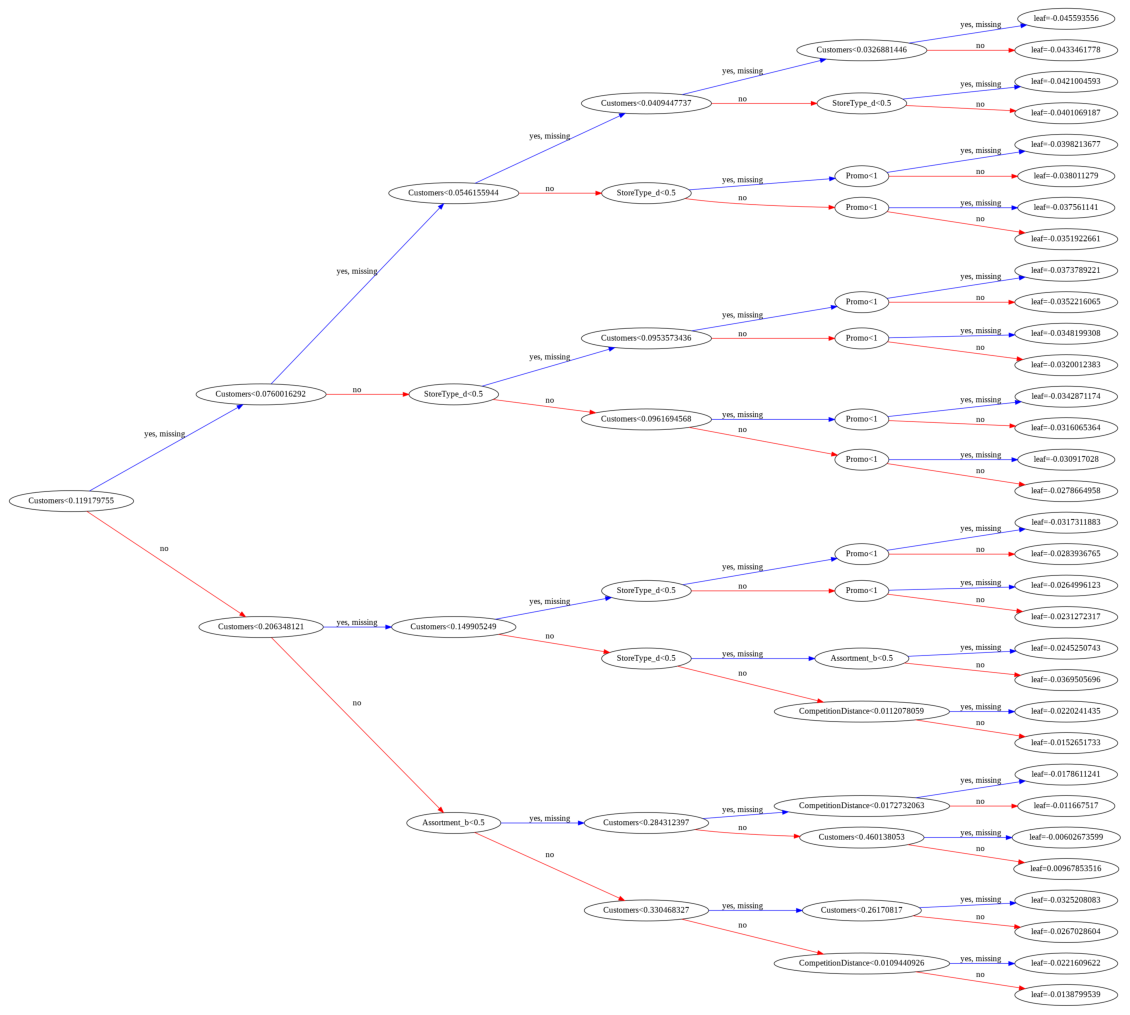

In [ ]:
# Importing XGBRegressor
from xgboost import XGBRegressor
# model fitting
xg_model = XGBRegressor(random_state=48, n_jobs=-1, n_estimators=40, max_depth=5)
# %%time
xg_model.fit(X_train,y_train)
# XG Boost evaluation
xg = model_evaluation('XG Boost Regressor',xg_model,X_train,y_train,X_test,y_test)

In [ ]:
# add results to comparison df
add_list_to_final_df(xg)

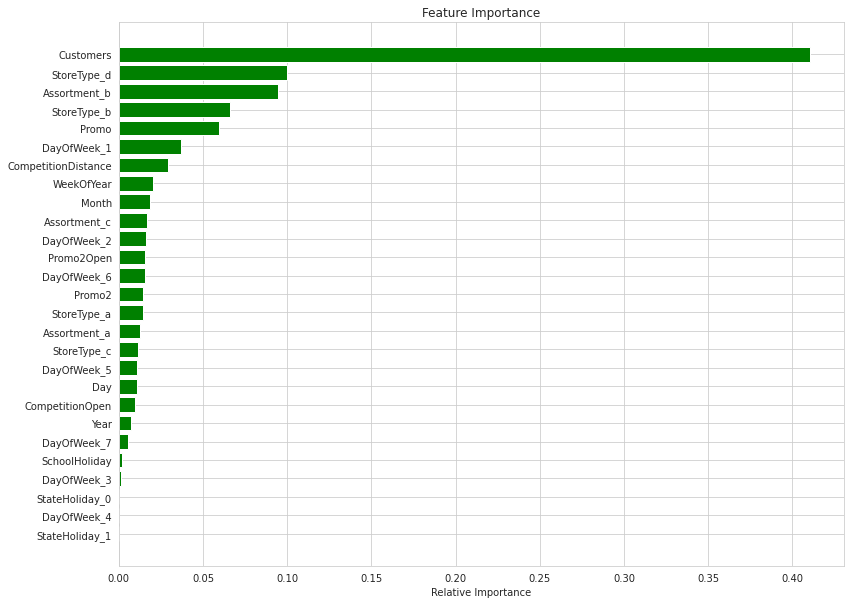

In [ ]:
# features importance
features = X_train.columns
importances = xg_model.feature_importances_
indices = np.argsort(importances)
# plotting feeature importance
plt.figure(figsize=(13,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. Here we can see XG Boost model result comes better than linear regression model with a test R^2 of 0.868203.

### Gradiant Boosting

The MAE for the Training set is 0.018341
The MSE for the Training set is 0.000622
The RMSE for the Training set is 0.024946
The R2 for the Training set is 0.88854
The Adjusted R2 for the Training set is 0.888537
--------------------------
The MAE for the validation set is 0.019574
The MSE for the validation set is 0.000755
The RMSE for the validation set is 0.027486
The R2 for the validation set is 0.863323
The Adjusted R2 for the validation set is 0.863242


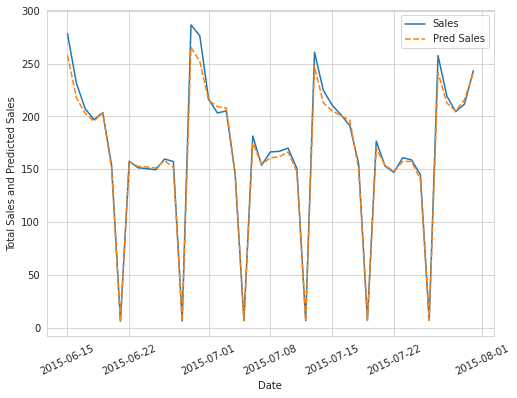

In [ ]:
# importing GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
g_boosting = GradientBoostingRegressor()
# fitting model to dataset
g_boosting.fit(X_train,y_train)
# Gradient Boosting evaluation
gb = model_evaluation('Gradient Boosting Regressor',g_boosting,X_train,y_train,X_test,y_test)

In [ ]:
# add results to comparison df
add_list_to_final_df(gb)

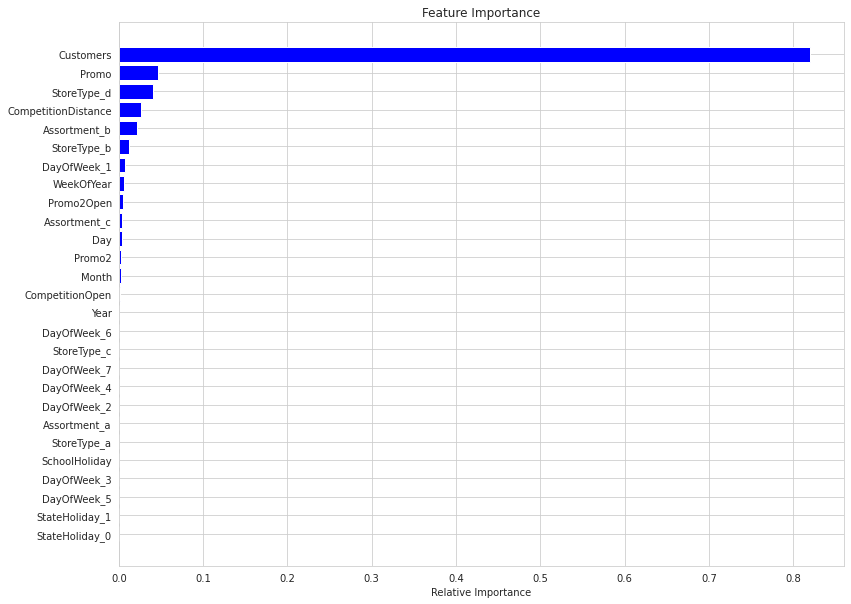

In [ ]:
# features importance
features = X_train.columns
importances = g_boosting.feature_importances_
indices = np.argsort(importances)
# plotting feeature importance
plt.figure(figsize=(13,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Gradiant Boosting is a supervised learning algorithm which can be used in regression and classification tasks. The results show that the gradient Boosting regressor score in test R^2 is 0.863323.

### Let's Check Model Performance and Evaluation

In [ ]:
comparisons_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,LinearRegression,0.022286,0.000931,0.030508,0.833293,0.833288,0.023233,0.001035,0.032167,0.812804,0.812693
1,Decision Tree Regressor,0.009700,0.000221,0.014860,0.960451,0.960450,0.013818,0.000436,0.020888,0.921065,0.921019
2,Random Forest Regressor,0.003066,0.000022,0.004729,0.995995,0.995995,0.010317,0.000242,0.015566,0.956166,0.956140
3,XG Boost Regressor,0.019090,0.000628,0.025061,0.887506,0.887502,0.019662,0.000728,0.026991,0.868203,0.868126
4,Gradient Boosting Regressor,0.018341,0.000622,0.024946,0.888540,0.888537,0.019574,0.000755,0.027486,0.863323,0.863242


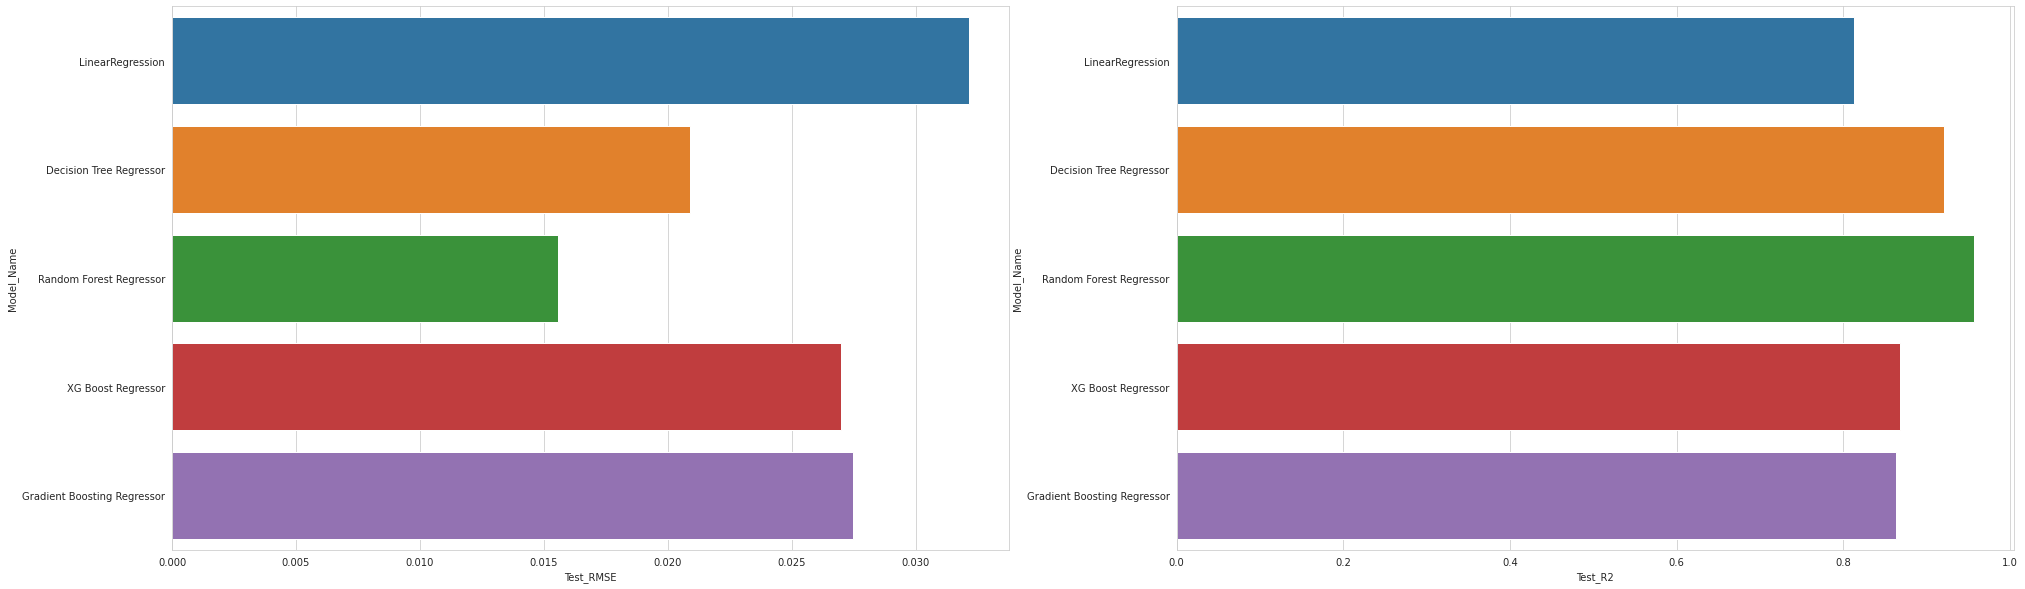

In [ ]:
# plotting our comparison df for Test R2 and Test RMSE
_, axes = plt.subplots(1, 2, figsize=(33, 10))

sns.barplot(x = 'Test_RMSE', y= 'Model_Name', data = comparisons_df, ax = axes[0]);
sns.barplot(x = 'Test_R2', y= 'Model_Name', data = comparisons_df, ax = axes[1]);

In [ ]:
# test values
lr_r2=0.812804
dt_r2 = 0.921065
random_r2 = 0.956166
xg_r2= 0.868203
gd_r2 = 0.863323

# Linear Regression vs Decision Tree
# improvement % 
improvement_r = ((dt_r2 - lr_r2)/lr_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Decision Tree against Linear Regression.')

# Random Forest vs Decision Tree
# improvement % 
improvement_r = ((random_r2 - dt_r2)/dt_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest against Decision Tree.')

# XG Boost vs Random Forest
# improvement % 
improvement_r = ((xg_r2 - random_r2)/random_r2)*100
print('Model Performance')
print(f'Degeneration of {round(improvement_r,3)} % was seen in XG Boost against Random Forest.')

# Gradiant Boosting vs XG Boost
# improvement % 
improvement_r = ((gd_r2 - xg_r2)/xg_r2)*100
print('Model Performance')
print(f'Degeneration of {round(improvement_r,3)} % was seen in Gradiant Boosting against XG Boost.')

Model Performance
Improvement of 13.319 % was seen in Decision Tree against Linear Regression.
Model Performance
Improvement of 3.811 % was seen in Random Forest against Decision Tree.
Model Performance
Degeneration of -9.2 % was seen in XG Boost against Random Forest.
Model Performance
Degeneration of -0.562 % was seen in Gradiant Boosting against XG Boost.


Model Performance Improvement of 13.319 % was seen in Decision Tree against Linear Regression, Improvement of 3.811 % was seen in Random Forest against Decision Tree, Degeneration of -9.2 % was seen in XG Boost against Random Forest, and Degeneration of -0.562 % was seen in Gradiant Boosting against XG Boost.

Hence, As is shown in the Model Performance and Evaluation, among all models, Random Forest Regressor works the best with the higher Test R^2 score and least Test RMSE we have, and provides a reliable prediction of the sales. 

# Conclusions and Recommendations

Businesses use sales forecasts to make better business decisions. It helps in overall business planning, budgeting, and risk management. Sales forecasting allows companies to efficiently allocate resources for future growth and manage its cash flow. Important decisions such as budgets, hiring, incentives, goals, acquisitions and various other growth plans are affected by the revenue the company is going to make in the coming months and for these plans to be as effective as they are planned to be it is important for these forecasts to also be as good.

The work here forecasts the sales of the various Rossmann stores across Europe for the recent six weeks.

**Some important conclusions drawn from the analysis are as follows:**


*   There were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week. This validates the hypothesis about this feature. The positive effect of promotion on Customers and Sales is observable. Store type B though being few in number had the highest sales average. Promotion is primordial for a store to increase its sales, it allows price breaking and thus more customers intersted in buying. Rossmann should focus on increasing the promotional offers per quarter for a,c,d and can minimize for b. Rossman should try to focus on reducing the Promo offers for store type b during StateHolidays as there is no substantial increase in Sales. Sales are increased during Christmas week, this might be due to the fact that people buy more beauty products during a Christmas celebration.
*   Random Forest Regressor Model gave the best results and 3.811 % improvement was seen from the decision tree model which indicates that all the trends and patterns that could be captured by these models without overfitting were done and maximum level of performance achievable by the model was achieved.

*   Rossman clearly stated that they were undergoing refurbishments
sometimes and had to close. The best solution here is to get rid of closed stores and prevent the models to train on them and get false guidance.

*   Analysis clearly states that if we run promotional advertisement then there is jump in average sales, So we can say running promotion is beneficial for stores. If we look over the years, there is a slight increase Year over Year but we don't see any major change from 2013 to 2015
and we actually see a very similar pattern in the months over the years with major spikes first around Easter period in
March and April then in Summer in May, June and July and then finally around the Christmas period in November and
December.

*   Store type a has the highest number of stores, sales and customers from the 4 different store types. But this doesn’t mean it’s the best performing store type. When looking at the average sales and number of customers, actually it is Store type b who was the highest average sales and highest average number of customers.

*   As we can see, Random forest regressor delivers a good predicition score while not having a lot of modifications and difficulties capturing the patterns hidden in the data. Fortunately we had a train set that was large enough for it to converge but in general Random Forest performs not so bad on small sets since its resampling method (bagging) and its random production of trees allow the bias to remain not so high and in this case always performs good on unseen data where as XGboost has tendency to overfit if not gently and smartly tuned.

*   Rossmann stores should focus on opening and operating stores with the aim of increasing customer count. As we can see in the feature importances, Customers, CompetitionDistance, StoreType_d	and Promo are the four most important factors which determine Sales. So in order to improve Sales Rossmann stores can offer more promotions, open more stores of type d and increase competition distances than competitors to attract more customers to increase sales and also to increase Company revenue.



## Thank You!